In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

import pandas as pd
import math
%matplotlib inline



In [2]:
url = 'https://twoldem-ml.s3.us-east-2.amazonaws.com/beerratings_edited.csv'

data = pd.read_csv(url)

data.head()

,Unnamed: 0,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,excellent_reviews
0,0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,not excellent
1,1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,not excellent
2,2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,not excellent
3,3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,not excellent
4,4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,excellent


In [3]:
# data = pd.read_csv('beerratings_edited.csv')
# data.head()

In [4]:
data_count = data.describe().transpose()
data_count

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1586614.0,793306.500000,458016.154338,0.00,396653.25,793306.5,1189959.75,1586613.0
brewery_id,1586614.0,3130.099202,5578.103987,1.00,143.00,429.0,2372.00,28003.0
review_overall,1586614.0,3.815581,0.720622,0.00,3.50,4.0,4.50,5.0
review_aroma,1586614.0,3.735636,0.697617,1.00,3.50,4.0,4.00,5.0
review_appearance,1586614.0,3.841642,0.616093,0.00,3.50,4.0,4.00,5.0
review_palate,1586614.0,3.743701,0.682218,1.00,3.50,4.0,4.00,5.0
review_taste,1586614.0,3.792860,0.731970,1.00,3.50,4.0,4.50,5.0
beer_abv,1518829.0,7.042387,2.322526,0.01,5.20,6.5,8.50,57.7
beer_beerid,1586614.0,21712.794279,21818.335997,3.00,1717.00,13906.0,39441.00,77317.0


In [5]:
data.drop(columns=['Unnamed: 0'])

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,excellent_reviews
0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,not excellent
1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,not excellent
2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,not excellent
3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,not excellent
4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,2006-11-05 00:01:32,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061,excellent
1586610,14359,The Defiant Brewing Company,2006-10-17 01:29:26,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061,excellent
1586611,14359,The Defiant Brewing Company,2006-10-13 01:21:53,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061,excellent
1586612,14359,The Defiant Brewing Company,2006-10-05 04:37:24,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061,excellent


In [6]:
data.isnull().sum()

Unnamed: 0                0
brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
excellent_reviews         7
dtype: int64

In [7]:
#replacing nulls with column means
column_means = data['beer_abv'].mean()
data['beer_abv'] = data['beer_abv'].fillna(column_means)
print(data)

         Unnamed: 0  brewery_id                 brewery_name  \
0                 0       10325              Vecchio Birraio   
1                 1       10325              Vecchio Birraio   
2                 2       10325              Vecchio Birraio   
3                 3       10325              Vecchio Birraio   
4                 4        1075      Caldera Brewing Company   
...             ...         ...                          ...   
1586609     1586609       14359  The Defiant Brewing Company   
1586610     1586610       14359  The Defiant Brewing Company   
1586611     1586611       14359  The Defiant Brewing Company   
1586612     1586612       14359  The Defiant Brewing Company   
1586613     1586613       14359  The Defiant Brewing Company   

                 review_time  review_overall  review_aroma  review_appearance  \
0        2009-02-16 20:57:03             1.5           2.0                2.5   
1        2009-03-01 13:44:57             3.0           2.5           

In [8]:
data.isnull().sum()

Unnamed: 0              0
brewery_id              0
brewery_name           15
review_time             0
review_overall          0
review_aroma            0
review_appearance       0
review_profilename    348
beer_style              0
review_palate           0
review_taste            0
beer_name               0
beer_abv                0
beer_beerid             0
excellent_reviews       7
dtype: int64

In [9]:
#need to update these with the mean scores
data.drop(columns=['excellent_reviews'])

,Unnamed: 0,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,1586609,14359,The Defiant Brewing Company,2006-11-05 00:01:32,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,1586610,14359,The Defiant Brewing Company,2006-10-17 01:29:26,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,1586611,14359,The Defiant Brewing Company,2006-10-13 01:21:53,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,1586612,14359,The Defiant Brewing Company,2006-10-05 04:37:24,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


In [10]:
#updating excellent reivews column
cut_reviews = ["not excellent", "excellent"]
review_bins = [0, 3.5, 5.0]
data['excellent_reviews'] = pd.cut(data['review_overall'], bins=review_bins, labels= cut_reviews)
data.head()

,Unnamed: 0,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,excellent_reviews
0,0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,not excellent
1,1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,not excellent
2,2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,not excellent
3,3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,not excellent
4,4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,excellent


In [11]:
data['excellent_reviews'].value_counts()

excellent        998469
not excellent    588138
Name: excellent_reviews, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [13]:
data['breweries'] = data["brewery_name"]
data.head()

,Unnamed: 0,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,excellent_reviews,breweries
0,0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,not excellent,Vecchio Birraio
1,1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,not excellent,Vecchio Birraio
2,2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,not excellent,Vecchio Birraio
3,3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,not excellent,Vecchio Birraio
4,4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,excellent,Caldera Brewing Company


In [14]:
#Graphing brewery reviews

brew = data.groupby(by="brewery_name")

mean = brew['review_overall'].mean()
median =brew['review_overall'].median()
std = brew['review_overall'].std()
SEM = brew['review_overall'].sem()
counts = brew['review_overall'].count()
taste = brew['review_taste'].mean()
# breweries = brew['breweries'].unique_values()

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
brew = pd.DataFrame({"Mean Review": mean, "Mean Taste Review":taste, "Median Review": median, "Standard Deviation": std, "SEM": SEM, "Number of Reviews": counts})

#print table
brew

,Mean Review,Mean Taste Review,Median Review,Standard Deviation,SEM,Number of Reviews
brewery_name,,,,,,
't Hofbrouwerijke,3.702703,3.621622,4.00,0.628705,0.103359,37
(512) Brewing Company,4.065789,4.055921,4.00,0.564880,0.032398,304
10 Barrel Brewing Co.,3.732143,3.636905,4.00,0.517445,0.056458,84
1516 Brewing Company,4.132353,4.073529,4.25,0.512108,0.087826,34
16 Mile Brewing Company,3.570652,3.472826,3.50,0.665399,0.069373,92
...,...,...,...,...,...,...
Ölvisholt Brugghús,3.912371,3.876289,4.00,0.661478,0.067163,97
Öufi Brauerei,3.500000,3.500000,3.50,NaN,NaN,1
Ølfabrikken,4.069966,4.198805,4.00,0.564826,0.023333,586


In [15]:
# brew['Index']= brew.reset_index()
# brew.head()

In [16]:
my_list = brew.columns.values.tolist()
my_list

['Mean Review',
 'Mean Taste Review',
 'Median Review',
 'Standard Deviation',
 'SEM',
 'Number of Reviews']

In [17]:
# brewlist = brew.index.values.tolist()
# brewlist

In [18]:
brew.sort_values(by=['Mean Review'], inplace=True, ascending=False)
brew.head()

,Mean Review,Mean Taste Review,Median Review,Standard Deviation,SEM,Number of Reviews
brewery_name,,,,,,
Weissbräu Kösslarn,5.0,4.5,5.0,NaN,NaN,1
Hakone Beer,5.0,5.0,5.0,NaN,NaN,1
Restaurant Flieger Bräu,5.0,4.5,5.0,0.0,0.0,2
Facer's Flintshire Brewery,5.0,4.0,5.0,NaN,NaN,1
Brauerei Gasthof Pfister GmbH,5.0,4.5,5.0,NaN,NaN,1


In [19]:
brewtop = brew.head(10)
brewtop.head()

,Mean Review,Mean Taste Review,Median Review,Standard Deviation,SEM,Number of Reviews
brewery_name,,,,,,
Weissbräu Kösslarn,5.0,4.5,5.0,NaN,NaN,1
Hakone Beer,5.0,5.0,5.0,NaN,NaN,1
Restaurant Flieger Bräu,5.0,4.5,5.0,0.0,0.0,2
Facer's Flintshire Brewery,5.0,4.0,5.0,NaN,NaN,1
Brauerei Gasthof Pfister GmbH,5.0,4.5,5.0,NaN,NaN,1


In [20]:
brewlist = brewtop.index.values.tolist()
brewlist

['Weissbräu Kösslarn',
 'Hakone Beer',
 'Restaurant Flieger Bräu',
 "Facer's Flintshire Brewery",
 'Brauerei Gasthof Pfister GmbH',
 'Thai Me Up',
 'Legends Sportsbar And Brewpub',
 "Liebhart's Privatbrauerei Detmold",
 'Brauerei Gundel',
 'Ludwig Roth Bierbrauerei GmbH']

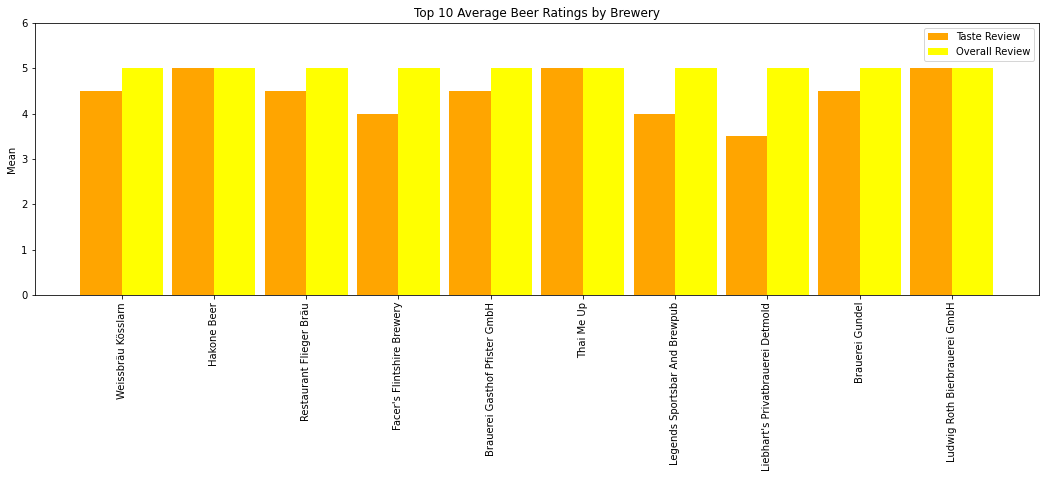

In [40]:
meanbrew = brewtop["Mean Review"] 
counts = brewtop["Mean Taste Review"] 


x = np.arange(len(brewlist))  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots(figsize=(18,5))
rects1 = ax.bar(x - width/2, counts, width, label='Taste Review', color="orange")
rects2 = ax.bar(x + width/2, meanbrew, width, label='Overall Review', color="yellow")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean')
ax.set_ylim([0,6])
ax.set_title('Top 10 Average Beer Ratings by Brewery')
ax.set_xticks(x)
ax.set_xticklabels(brewlist, rotation=90)
ax.legend()

fig.savefig("Top10AverageBeerRatingsBreweries.png",bbox_inches='tight', facecolor='w')

/Users/chilon/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


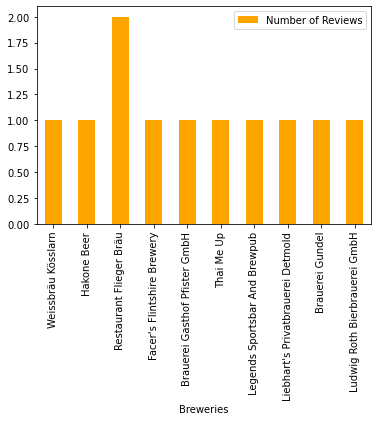

In [39]:
brewtop['Breweries'] = brewtop.index.values.tolist()

brewtop.plot.bar(x='Breweries', y='Number of Reviews', rot=90, color="orange")

fig.savefig("ReviewCountforTopRatedBreweries.png",bbox_inches='tight', facecolor='w')

# Beer Type 

In [23]:
# group by beers

#Graphing brewery reviews

brew2 = data.groupby(by="beer_style")

mean2 = brew2['review_overall'].mean()
median2 =brew2['review_overall'].median()
std2 = brew2['review_overall'].std()
SEM2 = brew2['review_overall'].sem()
counts2 = brew2['review_overall'].count()
taste2 = brew2['review_taste'].mean()
# breweries = brew['breweries'].unique_values()

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
brew2 = pd.DataFrame({"Mean Review": mean2, "Mean Taste Review":taste2, "Median Review": median2, "Standard Deviation": std2, "SEM": SEM2, "Number of Reviews": counts2})

#print table
brew2

,Mean Review,Mean Taste Review,Median Review,Standard Deviation,SEM,Number of Reviews
beer_style,,,,,,
Altbier,3.824054,3.744865,4.0,0.647033,0.007354,7741
American Adjunct Lager,3.001659,2.683112,3.0,0.940493,0.005363,30749
American Amber / Red Ale,3.781010,3.696127,4.0,0.670689,0.003136,45751
American Amber / Red Lager,3.564601,3.373590,3.5,0.755957,0.007834,9311
American Barleywine,3.896756,4.042633,4.0,0.620663,0.003796,26728
...,...,...,...,...,...,...
Vienna Lager,3.762564,3.603808,4.0,0.686363,0.007253,8954
Weizenbock,4.007969,4.077348,4.0,0.598310,0.006167,9412
Wheatwine,3.815563,3.977114,4.0,0.650294,0.010671,3714


In [24]:
brew2.sort_values(by=['Mean Review'], inplace=True, ascending=False)
brew2.head()

,Mean Review,Mean Taste Review,Median Review,Standard Deviation,SEM,Number of Reviews
beer_style,,,,,,
American Wild Ale,4.093262,4.149938,4.0,0.654242,0.004905,17794
Gueuze,4.086287,4.127143,4.0,0.641316,0.008273,6009
Quadrupel (Quad),4.071630,4.210909,4.0,0.629628,0.004682,18086
Lambic - Unblended,4.048923,4.124327,4.0,0.656766,0.019677,1114
American Double / Imperial Stout,4.029820,4.187230,4.0,0.666457,0.002960,50705


In [25]:
brewtop2 = brew2.head(10)

brewlist2 = brewtop2.index.values.tolist()
brewlist2

['American Wild Ale',
 'Gueuze',
 'Quadrupel (Quad)',
 'Lambic - Unblended',
 'American Double / Imperial Stout',
 'Russian Imperial Stout',
 'Weizenbock',
 'American Double / Imperial IPA',
 'Flanders Red Ale',
 'Rye Beer']

In [26]:
brewtop2.head()

,Mean Review,Mean Taste Review,Median Review,Standard Deviation,SEM,Number of Reviews
beer_style,,,,,,
American Wild Ale,4.093262,4.149938,4.0,0.654242,0.004905,17794
Gueuze,4.086287,4.127143,4.0,0.641316,0.008273,6009
Quadrupel (Quad),4.071630,4.210909,4.0,0.629628,0.004682,18086
Lambic - Unblended,4.048923,4.124327,4.0,0.656766,0.019677,1114
American Double / Imperial Stout,4.029820,4.187230,4.0,0.666457,0.002960,50705


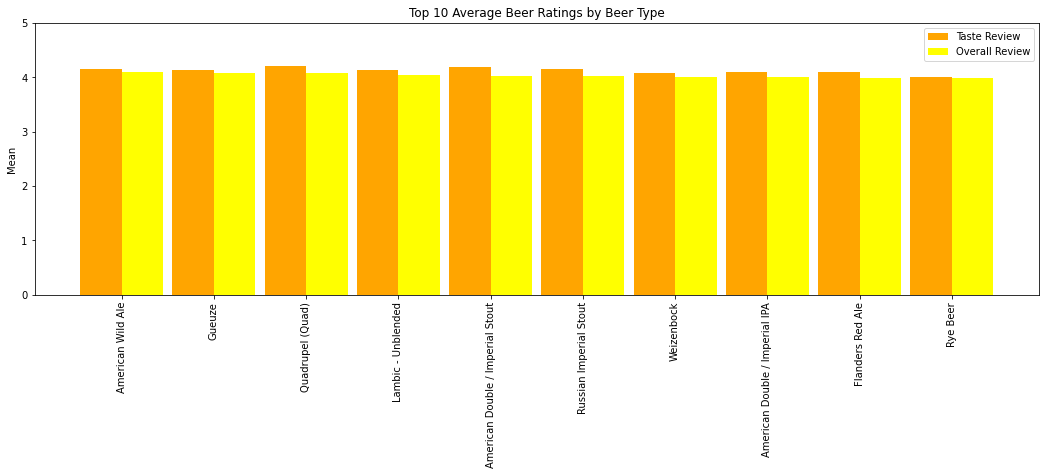

In [37]:
meanbrew2 = brewtop2["Mean Review"] 
counts2 = brewtop2["Mean Taste Review"] 


x = np.arange(len(brewlist2))  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots(figsize=(18,5))
rects1 = ax.bar(x - width/2, counts2, width, label='Taste Review', color="orange")
rects2 = ax.bar(x + width/2, meanbrew2, width, label='Overall Review', color="yellow")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean')
ax.set_ylim([0,5])
ax.set_title('Top 10 Average Beer Ratings by Beer Type')
ax.set_xticks(x)
ax.set_xticklabels(brewlist2, rotation=90)
ax.legend()

fig.savefig("TopRatedBeers.png",bbox_inches='tight', facecolor='w')

/Users/chilon/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


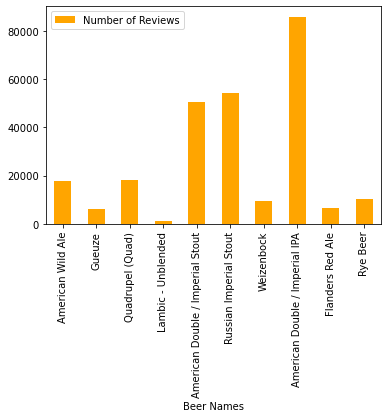

In [38]:
brewtop2['Beer Names'] = brewtop2.index.values.tolist()

brewtop2.plot.bar(x='Beer Names', y='Number of Reviews', rot=90, color="orange")

fig.savefig("ReviewCountforTopRatedBeers.png",bbox_inches='tight', facecolor='w')

In [29]:
brewtop2.head()

,Mean Review,Mean Taste Review,Median Review,Standard Deviation,SEM,Number of Reviews,Beer Names
beer_style,,,,,,,
American Wild Ale,4.093262,4.149938,4.0,0.654242,0.004905,17794,American Wild Ale
Gueuze,4.086287,4.127143,4.0,0.641316,0.008273,6009,Gueuze
Quadrupel (Quad),4.071630,4.210909,4.0,0.629628,0.004682,18086,Quadrupel (Quad)
Lambic - Unblended,4.048923,4.124327,4.0,0.656766,0.019677,1114,Lambic - Unblended
American Double / Imperial Stout,4.029820,4.187230,4.0,0.666457,0.002960,50705,American Double / Imperial Stout


In [30]:
import seaborn as sns

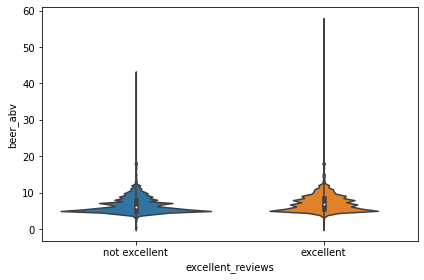

In [36]:
ax = sns.violinplot(x="excellent_reviews", y="beer_abv", data=data)
plt.tight_layout()
plt.savefig("violin.png",bbox_inches='tight', edgecolor='w', facecolor='w', format="png")

In [32]:
reviews = data['excellent_reviews']
abv= data['beer_abv']

df = pd.DataFrame({"Reviews": reviews, "abv": abv})

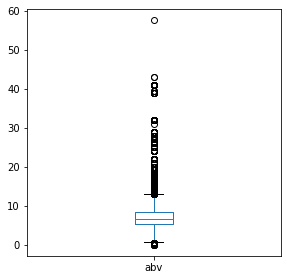

In [35]:

from matplotlib import pyplot

df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10,10))
# pyplot.show()
plt.autoscale()

plt.savefig("abvbox.png",bbox_inches='tight', edgecolor='w', facecolor= 'w', format="png")

In [ ]:
df.hist()
pyplot.show()